## Homework 6
The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

In this homework we'll again use the California Housing Prices dataset - the same one we used in homework 2 and 3.

You can take it from Kaggle or download using wget link mentioned below:

In [1]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=401e4b6aea128a0c66cf9e6b6ba10218099d61de01172c6e2bf42b64cddafca5
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wget

In [3]:
# Getting the data:
wget.download('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

'housing.csv'

In [4]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

##Loading the data
Use only the following columns:


```
'latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
'population', 'households', 'median_income', 'median_house_value', 
'ocean_proximity'
```


Fill NAs with 0.

Apply the log tranform to median_house_value.

Do train/validation/test split with 60%/20%/20% distribution.

Use the train_test_split function and set the random_state parameter to 1.

Use DictVectorizer to turn the dataframe into matrices.

In [10]:
columns = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 
           'total_bedrooms', 'population', 'households', 'median_income', 
           'median_house_value', 'ocean_proximity']

df = df[columns]
# Fill NAs with 0.
df = df.fillna(0)

In [12]:
# Use the train_test_split function and set the random_state parameter to 1.
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

# Apply the log tranform to median_house_value.
y_train = np.log(df_train['median_house_value'])
y_test = np.log(df_test['median_house_value'])
y_val = np.log(df_val['median_house_value'])

df_train = df_train[[x for x in list(df.columns) if x not in ['median_house_value']]]
df_test = df_test[[x for x in list(df.columns) if x not in ['median_house_value']]]
df_val = df_val[[x for x in list(df.columns) if x not in ['median_house_value']]]

In [14]:
features = [x for x in columns if x not in ['median_house_value']]

train_dicts = df_train[features].to_dict(orient='records')
val_dicts = df_val[features].to_dict(orient='records')

In [15]:
# Use DictVectorizer to turn the dataframe into matrices.
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

## Question 1
Let's train a decision tree regressor to predict the `median_house_value variable.`

Train a model with `max_depth=1`.
Which feature is used for splitting the data?

`ocean_proximity=INLAND` \
`total_rooms` \
`latitude` \
`population`

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

print(export_text(dt, feature_names=dv.get_feature_names()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Question 2
Train a random forest model with these parameters:

`n_estimators=10` \
`random_state=1` \
`n_jobs=-1` (optional - to make training faster) \

What's the RMSE of this model on validation?

0.05 \
0.25 \
0.55 \
0.85 

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
np.sqrt(mean_squared_error(y_val, y_pred))

0.24535086922393762

## Question 3
Now let's experiment with the n_estimators parameter

Try different values of this parameter from 10 to 200 with step 10. \
Set random_state to 1. \
Evaluate the model on the validation dataset. \
After which value of n_estimators does RMSE stop improving? \

10 \
55 \
75 \
150

In [21]:
n_estimators = range(10,201,10)
results = []

for n in n_estimators:
  rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_val)
  results.append(np.sqrt(mean_squared_error(y_val, y_pred)))

results

[0.2453508692239376,
 0.23896578156353054,
 0.2353358017117479,
 0.23449118937187777,
 0.23301531944286358,
 0.23267986818198144,
 0.2321928944574038,
 0.23223073917189813,
 0.23194861917758272,
 0.231821021330001,
 0.23162112873512117,
 0.23168895040062043,
 0.231740533185754,
 0.23164803817121404,
 0.23158266014959866,
 0.23157137688870616,
 0.2315049871241481,
 0.23165231364437017,
 0.23167369683681657,
 0.23158689829788362]

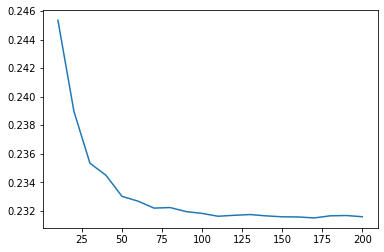

In [29]:
plt.plot(pd.Series(n_estimators), pd.Series(results));

In [30]:
pd.DataFrame(zip(n_estimators, pd.Series(results).round(5)))

,0,1
0,10,0.24535
1,20,0.23897
2,30,0.23534
3,40,0.23449
4,50,0.23302
5,60,0.23268
6,70,0.23219
7,80,0.23223
8,90,0.23195
9,100,0.23182


## Question 4
Let's select the best max_depth:

Try different values of max_depth: `[10, 15, 20, 25]` \
For each of these values, try different values of n_estimators from 10 till 200 (with step 10).
Fix the random seed: `random_state=1` \
What's the best max_depth:

10 \
15 \
20 \
25

In [31]:
depth_results = dict()
depths = [10, 15, 20, 25]
for depth in depths:
  estimators_results = []
  for n in n_estimators:
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1, max_depth=depth)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    estimators_results.append(np.sqrt(mean_squared_error(y_val, y_pred)))
  depth_results[depth] = estimators_results

In [32]:
depth_results

{10: [0.2554911759266139,
  0.2530011309075123,
  0.2516802158820001,
  0.2512530139520995,
  0.25024947550041304,
  0.25007712406289384,
  0.24986804072010946,
  0.2496246737042359,
  0.24932451551922594,
  0.2491701614582082,
  0.24894449427832607,
  0.2490013738259737,
  0.24910848119745221,
  0.24924172394215513,
  0.24925896377061393,
  0.24920491049252944,
  0.2490074533053919,
  0.24907941936731365,
  0.2490977338300802,
  0.24913003877578818],
 15: [0.24551197171380312,
  0.23979147409966242,
  0.23761988039158183,
  0.23656729936990087,
  0.23523880068363995,
  0.23519076018967314,
  0.23440847934749637,
  0.23423920094927006,
  0.2339954800652653,
  0.23374851737134783,
  0.23350147731629967,
  0.23360133225439003,
  0.2336235612538357,
  0.23350349261718392,
  0.23337993324043194,
  0.2333267007158316,
  0.23328845634768436,
  0.2334326031957687,
  0.2334483032122471,
  0.23335289060648787],
 20: [0.24625914065143542,
  0.23879719226137391,
  0.23557178660628167,
  0.2345699

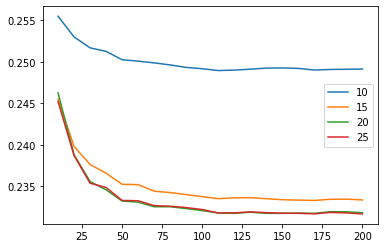

In [40]:
for depth in depths:
  plt.plot(pd.Series(n_estimators), pd.Series(depth_results[depth]), label=depth);
  plt.legend()

In [43]:
pd.Series(depth_results[20]).mean(), pd.Series(depth_results[25]).mean()

(0.2334480618450312, 0.23341604708408448)

In [44]:
pd.Series(depth_results[20]).mean() > pd.Series(depth_results[25]).mean()

True

## Question 5
We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorith, it finds the best split. When doint it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the imporatant features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the `feature_importances_` field.

For this homework question, we'll find the most important feature:

Train the model with these parametes:

```
n_estimators=10,
max_depth=20,
random_state=1,
n_jobs=-1 (optional)
```

Get the feature importance information from this model. What's the most important feature?

```
total_rooms
median_income
total_bedrooms
longitude
```



In [45]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

rf.feature_importances_

array([1.68883796e-02, 3.29234610e-02, 1.00635995e-01, 9.68721148e-02,
       3.63889964e-01, 3.06679246e-03, 3.10901161e-01, 3.58566277e-04,
       2.70076860e-04, 4.21955925e-03, 3.00099243e-02, 1.90503449e-02,
       2.09136608e-02])

In [47]:
df_importances = pd.DataFrame()
df_importances['feature'] = dv.get_feature_names_out()
df_importances['importance'] = rf.feature_importances_
df_importances

,feature,importance
0,households,0.016888
1,housing_median_age,0.032923
2,latitude,0.100636
3,longitude,0.096872
4,median_income,0.363890
5,ocean_proximity=<1H OCEAN,0.003067
6,ocean_proximity=INLAND,0.310901
7,ocean_proximity=ISLAND,0.000359
8,ocean_proximity=NEAR BAY,0.000270
9,ocean_proximity=NEAR OCEAN,0.004220


In [48]:
df_importances.sort_values(by='importance', ascending=False).head()

,feature,importance
4,median_income,0.363890
6,ocean_proximity=INLAND,0.310901
2,latitude,0.100636
3,longitude,0.096872
1,housing_median_age,0.032923


## Question 6
Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

- Install XGBoost \
- Create DMatrix for train and validation \
- Create a watchlist \
- Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,  
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
```


Now change eta first to 0.1 and then to 0.01

Which eta leads to the best RMSE score on the validation dataset? 

0.3 \
0.1 \
Both gives same

In [59]:
import xgboost as xgb

features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=[x.replace('<', '_') for x in features])
dval = xgb.DMatrix(X_val, label=y_val, feature_names=[x.replace('<', '_') for x in features])

watchlist = [(dtrain, 'train'), (dval, 'val')]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [60]:
watchlist

[(<xgboost.core.DMatrix at 0x7f730d435310>, 'train'),
 (<xgboost.core.DMatrix at 0x7f730d435dd0>, 'val')]

In [67]:
scores = {}

xgb_params = {'eta': 0.3, 'max_depth': 6, 'min_child_weight': 1, 
              'objective': 'reg:squarederror', 'nthread': 8, 
              'seed': 1, 'verbosity': 1}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval=5, evals=watchlist)
y_pred = model.predict(dval)
scores['eta=0.3'] = np.sqrt(mean_squared_error(y_val, y_pred))

xgb_params = {'eta': 0.1, 'max_depth': 6, 'min_child_weight': 1, 
              'objective': 'reg:squarederror', 'nthread': 8, 
              'seed': 1, 'verbosity': 1}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval=5, evals=watchlist)
y_pred = model.predict(dval)
scores['eta=0.1'] = np.sqrt(mean_squared_error(y_val, y_pred))

xgb_params = {'eta': 0.01, 'max_depth': 6, 'min_child_weight': 1, 
              'objective': 'reg:squarederror', 'nthread': 8, 
              'seed': 1, 'verbosity': 1}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval=5, evals=watchlist)
y_pred = model.predict(dval)
scores['eta=0.01'] = np.sqrt(mean_squared_error(y_val, y_pred))

[0]	train-rmse:8.12732	val-rmse:8.13244
[5]	train-rmse:1.40218	val-rmse:1.4074
[10]	train-rmse:0.344814	val-rmse:0.357816
[15]	train-rmse:0.235749	val-rmse:0.260986
[20]	train-rmse:0.214607	val-rmse:0.245319
[25]	train-rmse:0.203563	val-rmse:0.240326
[30]	train-rmse:0.194618	val-rmse:0.236939
[35]	train-rmse:0.186871	val-rmse:0.235404
[40]	train-rmse:0.180731	val-rmse:0.233578
[45]	train-rmse:0.176259	val-rmse:0.233307
[50]	train-rmse:0.171331	val-rmse:0.232969
[55]	train-rmse:0.165349	val-rmse:0.23169
[60]	train-rmse:0.160164	val-rmse:0.231095
[65]	train-rmse:0.156913	val-rmse:0.23059
[70]	train-rmse:0.153743	val-rmse:0.230701
[75]	train-rmse:0.150761	val-rmse:0.229754
[80]	train-rmse:0.147079	val-rmse:0.229026
[85]	train-rmse:0.144288	val-rmse:0.229107
[90]	train-rmse:0.1401	val-rmse:0.228564
[95]	train-rmse:0.137725	val-rmse:0.228231
[99]	train-rmse:0.135218	val-rmse:0.227837
[0]	train-rmse:10.4437	val-rmse:10.4494
[5]	train-rmse:6.17511	val-rmse:6.17976
[10]	train-rmse:3.65747	val-

In [68]:
scores

{'eta=0.3': 0.22783730798400148,
 'eta=0.1': 0.23245311365589444,
 'eta=0.01': 4.264994080718276}